In [ ]:
# Installing Packages 

!pip install numpy 
!pip install pandas 
!pip install yfinance 
!pip install matplotlib

     |████████████████████████████████| 5.5MB 11.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=ecc7e06503f444a880d9944b8e45a2b4d62e8e6908376beeed14fbb2caf8b7ff
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Importing Packages 

import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 

[*********************100%***********************]  1 of 1 completed
Buy and Hold strategy return and risk: 3.69% and 20.12%
RSI strategy return and risk: 12.87% and 9.5%


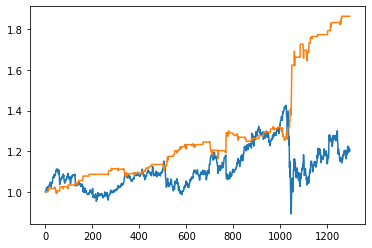

In [ ]:
# Downloading stock data 

stock = 'KO'
data = yf.download(stock, '2016-01-01', '2021-03-21')

# Specifying strategy parameters 

rsi_period = 14 
rsi_oversold = 30 
rsi_overbought = 70 
fee = 0.0005

# Technical Analysis Signals 

data['returns'] = data['Close'].pct_change()

data['Up'] = np.maximum(data['Close'].diff(), 0)

data['Down'] = np.maximum(-data['Close'].diff(), 0)

data['RS'] = data['Up'].rolling(rsi_period).mean()/data['Down'].rolling(rsi_period).mean()

data['RSI'] = 100 - 100/(1 + data['RS'])

# Simulating Trading Strategies 

start = rsi_period 

data['signal'] = 1*(data['RSI'] < rsi_oversold) - 1*(data['RSI'] > rsi_overbought)

BnH_return = np.array(data['returns'][start + 1:])

RSI_return = np.array(data['returns'][start + 1:])*np.array(data['signal'][start:-1]) - fee*abs(np.array(data['signal'][start+1:]) - np.array(data['signal'][start:-1]))

BnH = np.prod(1+BnH_return)**(252/len(BnH_return)) - 1

RSI = np.prod(1+RSI_return)**(252/len(RSI_return)) - 1

BnH_risk = np.std(BnH_return)*(252)**(1/2)

RSI_risk = np.std(RSI_return)*(252)**(1/2)

# Visualizing the results 

print('Buy and Hold strategy return and risk: ' + str(round(BnH * 100,2)) + '% and ' + str(round(BnH_risk*100,2)) + '%')

print('RSI strategy return and risk: ' + str(round(RSI * 100,2)) + '% and ' + str(round(RSI_risk*100,2)) + '%')

plt.plot(np.append(1, np.cumprod(1+BnH_return)))

plt.plot(np.append(1, np.cumprod(1+RSI_return)))